In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np 
import seaborn as sns
from shapely.geometry import Point


# Import geometry features and data

In [7]:
shapefile_path = '../lcd_000b21a_e/lcd_000b21a_e.shp'
canada_provinces = gpd.read_file(shapefile_path)
new_21_quebec = canada_provinces[canada_provinces["PRUID"] == "24"]
quebec = canada_provinces[canada_provinces['CDUID'] == '2401']
quebec_full = new_21_quebec

# Import Residency total data

In [25]:
quebec = canada_provinces[canada_provinces['CDUID'] == '2401']
quebec_full = new_21_quebec
df = pd.read_csv('./canada_residency_data.csv')
df = df.drop("COORDONNÉES", axis = 1)
data_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"])]
geom_data = data_menage_region["DGUID"]


In [31]:
total_region = data_menage_region[("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]
total_region = total_region.sort_values(by=['VALEUR'],ascending=False)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3077079071.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_region = data_menage_region[("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]


In [32]:
Top_region = total_region.iloc[:10][["GÉO","VALEUR"]]

<Axes: title={'center': 'Nombre de résidences en fonction des zones majeures'}, xlabel='MRC', ylabel='Total de residences'>

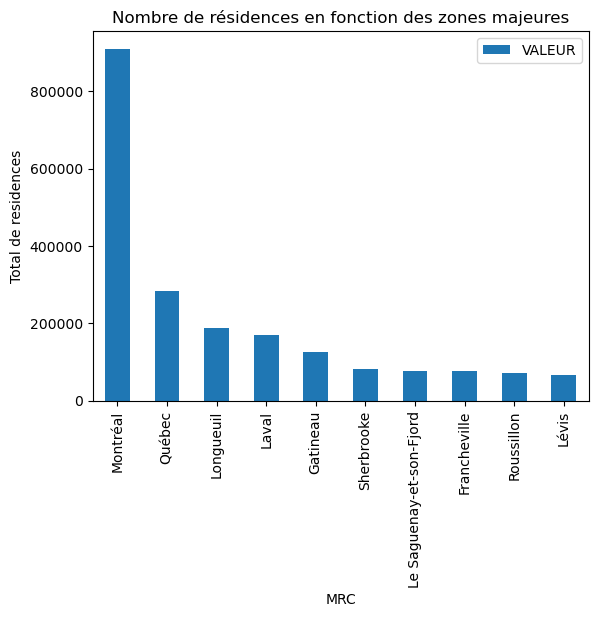

In [33]:
Top_region.plot(kind = "bar", x = 'GÉO', title="Nombre de résidences en fonction des zones majeures",xlabel = "MRC", ylabel = "Total de residences")

In [102]:
data_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"]) & ("Total - Type de construction résidentielle"!=df["Type de construction résidentielle (9)"])]

In [84]:
variations_per_cat = data_menage_region[data_menage_region["VALEUR"] > 100].groupby("Type de construction résidentielle (9)").sum()["VALEUR"].sort_values(ascending=False)

<Axes: >

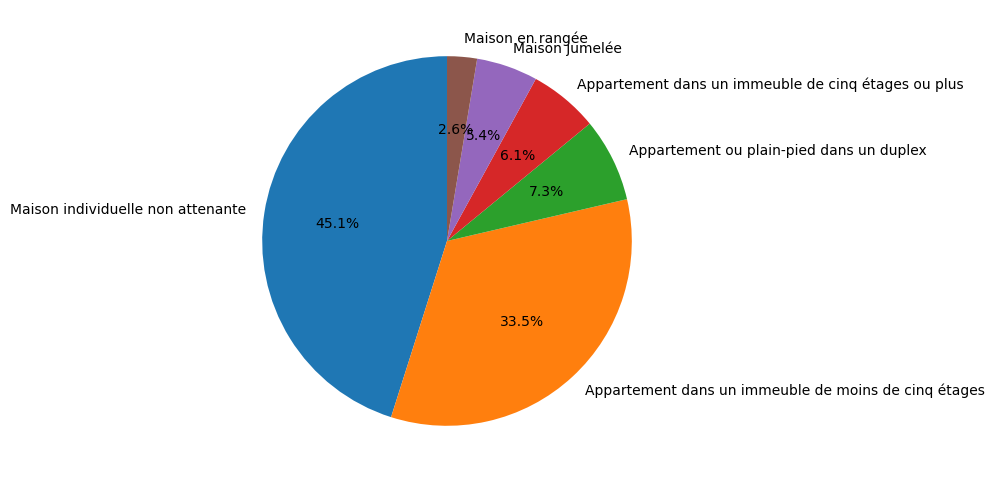

In [85]:
variations_per_cat[:6].plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), ylabel = "")

In [86]:
variations_per_cat

Type de construction résidentielle (9)
Maison individuelle non attenante                       1671945.0
Appartement dans un immeuble de moins de cinq étages    1242905.0
Appartement ou plain-pied dans un duplex                 271260.0
Appartement dans un immeuble de cinq étages ou plus      224885.0
Maison jumelée                                           198945.0
Maison en rangée                                          96820.0
Logement mobile                                           21920.0
Autre maison individuelle attenante                       12510.0
Name: VALEUR, dtype: float64

In [138]:
data_menage_region

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),VALEUR
2,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison individuelle non attenante,Total - Taille du ménage,4945.0
4,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison jumelée,Total - Taille du ménage,200.0
6,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison en rangée,Total - Taille du ménage,105.0
8,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement ou plain-pied dans un duplex,Total - Taille du ménage,160.0
10,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,355.0
...,...,...,...,...,...,...
1727,2021.0,Nord-du-Québec,2021A00032499,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,1780.0
1730,2021.0,Nord-du-Québec,2021A00032499,Autre maison individuelle attenante,Total - Taille du ménage,25.0
1732,2021.0,Nord-du-Québec,2021A00032499,Logement mobile,Total - Taille du ménage,920.0
1734,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
data_menage_region_news = data_menage_region.copy()

In [149]:
for index, row in data_menage_region.iterrows():
    if row["Type de construction résidentielle (9)"] == "Maison en rangée" :
        jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Maison jumelée")].index[0]
        data_menage_region_news.at[jum_row,"VALEUR"] += row["VALEUR"]
        data_menage_region_news = data_menage_region_news.drop(index)
        
    if row["Type de construction résidentielle (9)"] == "Appartement dans un immeuble de moins de cinq étages" :
        jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex")].index[0]
        data_menage_region_news.at[jum_row,"VALEUR"] += row["VALEUR"]
        data_menage_region_news = data_menage_region_news.drop(index)
        
    if row["Type de construction résidentielle (9)"] == "Appartement dans un immeuble de cinq étages ou plus" :
        jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex")].index[0]
        data_menage_region_news.at[jum_row,"VALEUR"] += row["VALEUR"]
        data_menage_region_news = data_menage_region_news.drop(index)
        

    if row["Type de construction résidentielle (9)"] == "Logement mobile" :
        data_menage_region_news = data_menage_region_news.drop(index)
        
    if row["Type de construction résidentielle (9)"] == "Autre maison individuelle attenante" :
        data_menage_region_news = data_menage_region_news.drop(index)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex")].index[0]
C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex")].index[0]
C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Maison jumelée

C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Maison jumelée")].index[0]
C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex")].index[0]
C:\Users\xuebi\AppData\Local\Temp\ipykernel_23704\3954818755.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jum_row = data_menage_region_news[(data_menage_region["DGUID"] == row["DGUID"]) & (data_menage_region["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex

In [129]:
data_menage_region_news["Type de construction résidentielle (9)"].loc[12]

'Appartement dans un immeuble de cinq étages ou plus'

In [153]:
data_menage_region_news[data_menage_region_news["GÉO"] == "Communauté maritime des Îles-de-la-Madeleine"]

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),VALEUR
2,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison individuelle non attenante,Total - Taille du ménage,4945.0
4,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison jumelée,Total - Taille du ménage,305.0
8,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement ou plain-pied dans un duplex,Total - Taille du ménage,520.0


In [154]:
for index, row in data_menage_region_news.iterrows():
    if row["Type de construction résidentielle (9)"] == "Maison individuelle non attenante" :
        data_menage_region_news.at[index,"Type de construction résidentielle (9)"] = "Maisons unifamiliales" 

        
    if row["Type de construction résidentielle (9)"] == "Maison jumelée" :
        data_menage_region_news.at[index,"Type de construction résidentielle (9)"] = "Maisons individuelles attenantes" 
            
    if row["Type de construction résidentielle (9)"] == "Appartement ou plain-pied dans un duplex" :
        data_menage_region_news.at[index,"Type de construction résidentielle (9)"] = "Appartements"


In [155]:
data_menage_region_news

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),VALEUR
2,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maisons unifamiliales,Total - Taille du ménage,4945.0
4,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maisons individuelles attenantes,Total - Taille du ménage,305.0
8,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartements,Total - Taille du ménage,520.0
20,2021.0,Le Rocher-Percé,2021A00032402,Maisons unifamiliales,Total - Taille du ménage,6670.0
22,2021.0,Le Rocher-Percé,2021A00032402,Maisons individuelles attenantes,Total - Taille du ménage,290.0
...,...,...,...,...,...,...
1719,2021.0,Nord-du-Québec,2021A00032499,Maisons unifamiliales,Total - Taille du ménage,7860.0
1721,2021.0,Nord-du-Québec,2021A00032499,Maisons individuelles attenantes,Total - Taille du ménage,3510.0
1725,2021.0,Nord-du-Québec,2021A00032499,Appartements,Total - Taille du ménage,2225.0
1734,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
cat_new = data_menage_region_news[data_menage_region_news["VALEUR"] > 100].groupby("Type de construction résidentielle (9)").sum()["VALEUR"].sort_values(ascending=False)

<Axes: >

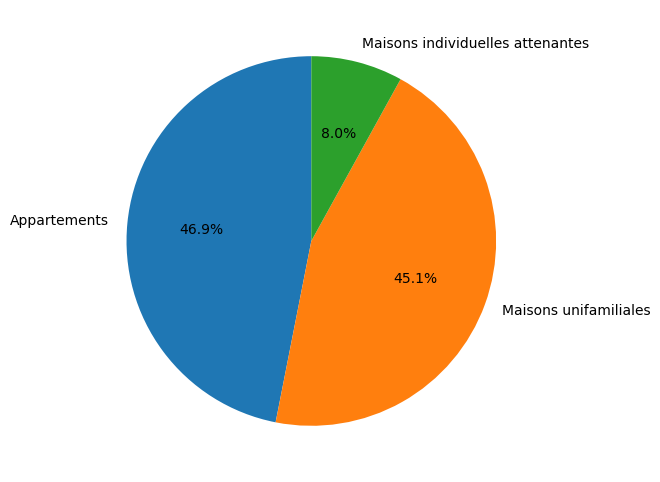

In [157]:
cat_new.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), ylabel = "")

In [158]:
quebec_full['Maisons unifamiliales'] = 0
quebec_full['Maisons individuelles attenantes'] = 0
quebec_full['Appartements'] = 0


C:\Users\xuebi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\xuebi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\xuebi\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [159]:
list_of_importance = ['Maisons unifamiliales','Maisons individuelles attenantes', 'Appartements']
for index, row in quebec_full.iterrows():
    geoid = row["CDUID"]
    local_d = data_menage_region_news[data_menage_region_news["DGUID"] ==f"2021A0003{geoid}"]
    for elements in list_of_importance:
        try:
            quebec_full.at[index, elements] = local_d[local_d["Type de construction résidentielle (9)"] == elements]["VALEUR"]._values[0]

        except:
            quebec_full.at[index, elements] = 0

In [160]:
quebec_full

,CDUID,DGUID,CDNAME,CDTYPE,LANDAREA,PRUID,geometry,Maisons unifamiliales,Maisons individuelles attenantes,Appartements
47,2401,2021A00032401,Communauté maritime des Îles-de-la-Madeleine,TÉ,187.3321,24,"MULTIPOLYGON (((8402342.297 1780238.997, 84023...",4945,305,520
48,2402,2021A00032402,Le Rocher-Percé,MRC,3074.7998,24,"MULTIPOLYGON (((8181690.374 1825926.283, 81816...",6670,290,1190
49,2403,2021A00032403,La Côte-de-Gaspé,MRC,4088.3915,24,"MULTIPOLYGON (((8114222.526 1860607.483, 81142...",6020,365,1560
50,2404,2021A00032404,La Haute-Gaspésie,MRC,5053.8784,24,"POLYGON ((8084607.814 1855258.12, 8084772.677 ...",4045,285,1005
51,2405,2021A00032405,Bonaventure,MRC,4379.4623,24,"MULTIPOLYGON (((8088685.746 1727795.514, 80886...",6400,340,1170
...,...,...,...,...,...,...,...,...,...,...
140,2495,2021A00032495,La Haute-Côte-Nord,MRC,11295.8159,24,"MULTIPOLYGON (((7828564.349 1633826.117, 78285...",3790,385,765
141,2496,2021A00032496,Manicouagan,MRC,34655.0440,24,"MULTIPOLYGON (((7874166.529 1756465.937, 78741...",8500,1135,2805
142,2497,2021A00032497,Sept-Rivières--Caniapiscau,CDR,94464.3471,24,"MULTIPOLYGON (((7963964.154 1910786.663, 79639...",8685,1715,4600
143,2498,2021A00032498,Minganie--Le Golfe-du-Saint-Laurent,CDR,94027.0662,24,"MULTIPOLYGON (((8437696.623 2298326.914, 84376...",3450,230,270


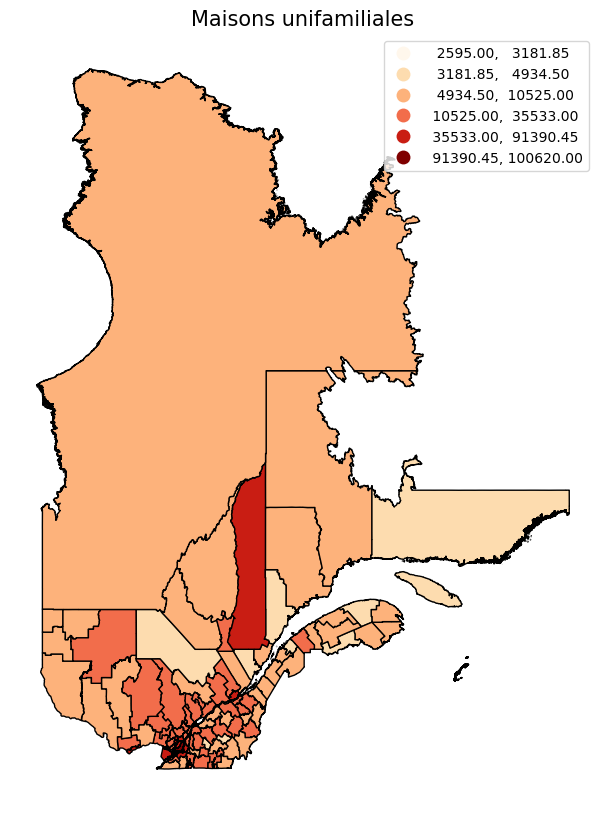

In [161]:
quebec_full_WGS = quebec_full.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 10))
quebec_full_WGS.plot(column = "Maisons unifamiliales", ax=ax, cmap='OrRd',scheme='percentiles', edgecolor='black',legend=True)
# Add title and remove axes
ax.set_title('Maisons unifamiliales', fontsize=15)
ax.set_axis_off()
plt.show()